<h1>App Physics 155 - LE 2</h1>
<h2>Kenneth V. Domingo<br />
2015-03116</h2>

<b>Problem 2.4: Fourier filtering</b>

The function $f(t)$ represents a square-wave with amplitude 1 and frequency 1 Hz.

Let us attempt to smooth this function using a Fourier transform, as we did in the previous exercise. Write a program that
creates an array of $N$ = 1000 elements containing a thousand equally spaced samples from a single cycle of this square-wave. Calculate the discrete Fourier transform of the array. Now set all but the first ten Fourier coefficients to zero, then invert the Fourier transform again to recover the smoothed signal. Make a plot of the result and on the same axes show the
original square-wave as well. You should find that the signal is not simply smoothed — there are artifacts, wiggles, in the results. Explain briefly where these come from.

Artifacts similar to these arise when Fourier coefficients are discarded in audio and visual compression schemes like those described in Section 7.3.1 and are the primary source of imperfections in digitally compressed sound and images.

In [1]:
import numpy as np
import matplotlib.pyplot as mp
import numpy.fft as fft
%matplotlib inline

In [85]:
"""
def dft(y):
    N = len(y)
    c = np.array([], complex)
    for k in range(N):
        cm = 0.0
        for n in range(N):
            cm += y[n] * np.exp(-1j*2*np.pi*k*n/N)
        np.append(c, cm/N)
    return c
        
def idft(c):
    N = len(c)
    y = np.array([], complex)
    for k in range(N):
        ym = 0.0
        for n in range(N):
            ym += c[n] * np.exp(1j*2*np.pi*k*n/N)
        np.append(y, ym)
    return y
"""

def dft(y):
    N = len(y)
    c = np.zeros(N//2 + 1, complex)
    n = np.arange(0,N)
    for k in range(N//2 + 1):
        c[k] = sum(y*np.exp(-1j*2*np.pi*k*n/N))/2
    return c

def idft(c):
    N = len(c)
    y = np.zeros(N//2 + 1, complex)
    n = np.arange(0,N)
    for k in range(N//2 + 1):
        y[k] = 2/N*sum(c*np.exp(1j*4*np.pi*k*n/N))
    return y

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


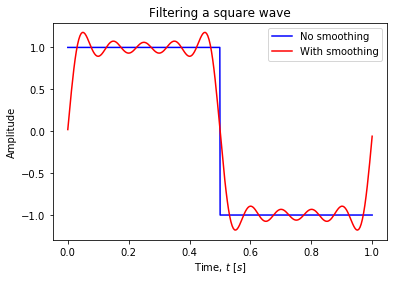

In [86]:
N = 1000
y1 = np.ones(N)*-1
x1 = np.linspace(0,1,N)
y1[:N//2] = 1
mp.plot(x1,y1, "b", label="No smoothing")

c = dft(y1)
c[11:] = 0
y2 = idft(c)
x2 = np.linspace(0,1,len(y2))
mp.plot(x2,y2, "r", label ="With smoothing")

mp.title("Filtering a square wave")
mp.xlabel("Time, $t$ [$s$]")
mp.ylabel("Amplitude")
mp.legend()
mp.show()